In [1]:
import numpy as np
import pandas as pd

In [2]:
dataset = pd.read_csv('/content/dataset.csv') 
dataset.shape

train, validation, test = \
              np.split(dataset.sample(frac=1, random_state=42), 
                       [int(.7*len(dataset)), int(.8*len(dataset))])

In [3]:
# I want to see the shape of all subsets to preprocess them by using Numpy, so;

print(train.shape)
print(validation.shape)
print(test.shape)

(42000, 13)
(6000, 13)
(12000, 13)


In [4]:
#Data preprocess is necessary, we need to take the last columns as labels and remainings are features.
#We have 12 features and 1 label.
#Converting dataframe to np array is done in this code.

train_features = train.iloc[:,:12]
train_labels = train.iloc[:,12:13]
train_features_arr = np.asarray(train_features)
train_labels_arr = train_labels.to_numpy()

test_features = test.iloc[:,:12]
test_labels = test.iloc[:,12:13]
test_features_arr = np.asarray(test_features)
test_labels_arr = test_labels.to_numpy()

validation_features = validation.iloc[:,:12]
validation_labels = validation.iloc[:,12:13]
validation_features_arr = np.asarray(validation_features)
validation_labels_arr = validation_labels.to_numpy()


In [5]:
train_features_arr = (train_features_arr-np.min(train_features_arr))/(np.max(train_features_arr)-np.min(train_features_arr))

# **Mini Batch**

In [38]:
def sig(features,weights):
  z = np.exp(-1*np.matmul(features,weights))
  result = 1/(1+z)
  return result

def ascent(features,weights,y):
  return np.matmul(features.T,y- sig(features,weights))
  
def prediction(features,weights):
  pred = np.zeros(features.shape[0])
  temp = np.matmul(features, weights)
  for i in range(features.shape[0]):
      if(temp[i] > 0):
          pred[i] = 1
      else:
          pred[i] = 0
  return pred

def createMiniBatch(arr, size):
  for i in range(0, len(arr), size):
      yield arr[i:i+size]

def accCalc(pred, y):
  true_cnt = 0
  for i in range(y.shape[0]):
    if(pred[i] == y[i]):
      true_cnt += 1
  acc = true_cnt / y.shape[0]
  return acc

#mini batch func 
def miniBatchExp(batchSize, epochNum, weights, accArr, lRate):
  np.random.seed(0)
  for i in range(epochNum):
      idx = np.random.permutation(len(train_features_arr))
      xRand, yRand = train_features_arr[idx], train_labels_arr[idx]
      xMbArr = list(createMiniBatch(xRand, batchSize))
      yMbArr = list(createMiniBatch(yRand, batchSize))
      for bIdx in range(int(batchSize)):
          xMb = xMbArr[bIdx]
          yMb = yMbArr[bIdx]
          weights += (lRate / batchSize) * (ascent(xMb, weights, yMb)) * xMb.shape[0]
      mbPrediction = prediction(validation_features_arr, weights)
      accArr[i] = accCalc(mbPrediction, validation_labels_arr)


In [39]:
import time
batch_size = 64
iterationNo = 100

In [45]:
batch_no = np.ceil(train_features.shape[0] / batch_size)

w1 = np.random.normal(0, 1, size=(train_features.shape[1],1))

arr1 = np.zeros((iterationNo))

s1 = time.time()
miniBatchExp(batch_size, iterationNo, w1, arr1, 10**-3) 
e1 = time.time()

print("Acc: ", arr1.max(), "Time: ", e1 - s1)

Acc:  0.6776666666666666 Time:  3.9817965030670166


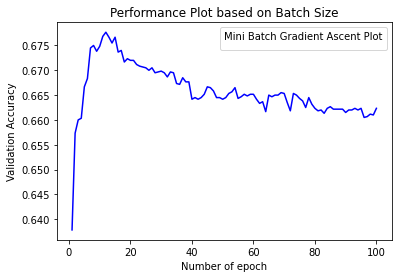

In [47]:
import matplotlib.pyplot as plt

x = np.arange(1, 101)
y = arr1

plt.title("Performance Plot based on Batch Size")
plt.ylabel("Validation Accuracy")
plt.xlabel("Number of epoch")
plt.plot(x, y, color ="blue")
plt.legend()
plt.legend(title='Mini Batch Gradient Ascent Plot')
plt.show()

# Stochastic Gradient

In [9]:
def stochasticGradient(epochNum, weights, accArr):
  np.random.seed(0)
  cnt=0
  for i in range(epochNum):
      idx = np.random.permutation(len(train_features_arr))
      xRand = train_features_arr[idx]
      yRand = train_labels_arr[idx]
      for bIdx in range(xRand.shape[0]):
          rand_feature = xRand[bIdx,:].reshape((xRand.shape[1],1)).T
          rand_label = yRand[bIdx,:].reshape((yRand.shape[1],1))
          weights += (10 ** -3) * ascent(rand_feature, weights, rand_label)
      s_prediction = prediction(validation_features_arr, weights)
      accArr[i] = accCalc(s_prediction, validation_labels_arr)

In [48]:
w2 = np.random.normal(0, 1, size=(train_features.shape[1],1))

arr2 = np.zeros((iterationNo))

s2 = time.time()
stochasticGradient(iterationNo, w2, arr2) 
e2 = time.time()

print("Acc: ", arr2.max(), "Time: ", e2 - s2)


Acc:  0.6753333333333333 Time:  59.259763956069946


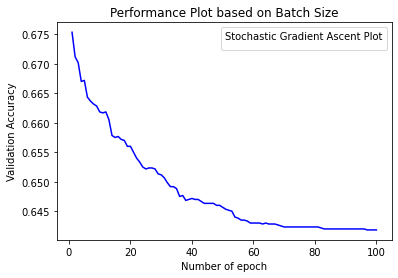

In [60]:
import matplotlib.pyplot as plt

x = np.arange(1, 101)
y = arr2

plt.title("Performance Plot based on Batch Size")
plt.ylabel("Validation Accuracy")
plt.xlabel("Number of epoch")
plt.plot(x, y, color ="blue")
plt.legend()
plt.legend(title='Stochastic Gradient Ascent Plot')
plt.show()

# FULL BATCH

In [49]:
def fullBatch(epochNum, weights, accArr, lRate):
  np.random.seed(0)
  for i in range(iterationNo):
      idx = np.random.permutation(len(train_features_arr))
      xRand,yRand = train_features_arr[idx], train_labels_arr[idx]
      xMbArr = list(createMiniBatch(xRand, xRand.shape[0]))
      yMbArr = list(createMiniBatch(yRand, yRand.shape[0]))
      weights += (lRate /batch_size) * (ascent(xMbArr[0],weights,yMbArr[0]))*xMbArr[0].shape[0]
      fb_prediction = prediction(validation_features_arr, weights)
      accArr[i] = accCalc(fb_prediction, validation_labels_arr)


In [51]:
w3 = np.random.normal(0, 1, size=(train_features.shape[1],1))

arr3 = np.zeros((iterationNo))

s3 = time.time()
fullBatch(iterationNo, w3, arr3, 10 ** -3)
e3 = time.time()

print("Acc: ", arr3.max(), "Time: ", e3 - s3)

<ipython-input-38-a5cbce557ae8>:2: RuntimeWarning: overflow encountered in exp
  z = np.exp(-1*np.matmul(features,weights))


Acc:  0.6891666666666667 Time:  3.9423913955688477


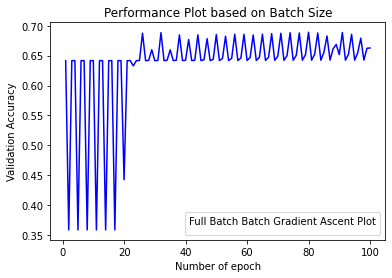

In [62]:
import matplotlib.pyplot as plt

x = np.arange(1, 101)
y = arr3

plt.title("Performance Plot based on Batch Size")
plt.ylabel("Validation Accuracy")
plt.xlabel("Number of epoch")
plt.plot(x, y, color ="blue")
plt.legend()
plt.legend(title='Full Batch Batch Gradient Ascent Plot')
plt.show()

The best is Full Batch, therefore its confusion matrix will be displayed.

In [63]:
def confusionMatrix(pred, y):
  tp, tn, fp, fn = 0, 0, 0, 0;
  for i in range(y.shape[0]):
      if(pred[i] == 1 and y[i] ==1):
          tn += 1 #OUR CLASS 0 IS POSITIVE CLASS AND CLASS 1 IS NEGATIVE CLASS, SO I DESIGNED CM LIKE THIS.
      elif(pred[i] == 0 and y[i] == 0):
          tp += 1
      elif(pred[i] == 1 and y[i] == 0):
          fn += 1
      elif(pred[i] == 0 and y[i] == 1):
          fp += 1
  conf_matrix = pd.DataFrame([[tp, fp],[fn, tn]])
  print(tp,tn,fp,fn)
  return conf_matrix

fb_prediction = prediction(validation_features_arr, w3)
confusionMatrix(fb_prediction, validation_labels_arr)


3807 170 1980 43


,0,1
0,3807,1980
1,43,170


Uniformly distributed weight

In [65]:
w4 = np.random.uniform(size=(train_features.shape[1],1))

arr4 = np.zeros((iterationNo))

s4 = time.time()
miniBatchExp(batch_size, iterationNo, w4, arr4, 10**-3) 
e4 = time.time()

print("Acc: ", arr4.max(), "Time: ", e4 - s4)

Acc:  0.6466666666666666 Time:  3.9756622314453125


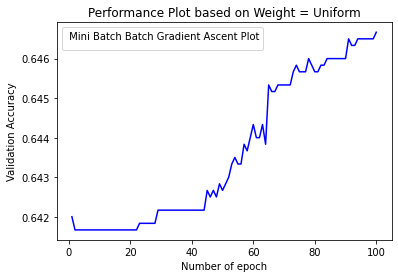

In [72]:
import matplotlib.pyplot as plt

x = np.arange(1, 101)
y = arr4

plt.title("Performance Plot based on Weight = Uniform")
plt.ylabel("Validation Accuracy")
plt.xlabel("Number of epoch")
plt.plot(x, y, color ="blue")
plt.legend()
plt.legend(title=' Mini Batch Batch Gradient Ascent Plot')
plt.show()

Zero Weight

In [73]:
w5 = np.zeros((train_features.shape[1],1))

arr5 = np.zeros((iterationNo))

s5 = time.time()
miniBatchExp(batch_size, iterationNo, w5, arr5, 10**-3) 
e5 = time.time()

print("Acc: ", arr5.max(), "Time: ", e5 - s5)



Acc:  0.6533333333333333 Time:  4.676999807357788


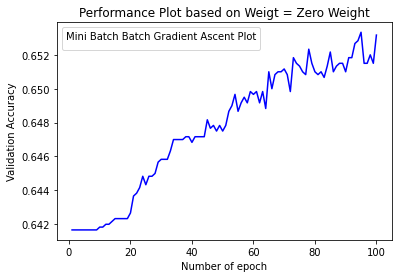

In [74]:
import matplotlib.pyplot as plt

x = np.arange(1, 101)
y = arr5

plt.title("Performance Plot based on Weigt = Zero Weight")
plt.ylabel("Validation Accuracy")
plt.xlabel("Number of epoch")
plt.plot(x, y, color ="blue")
plt.legend()
plt.legend(title='Mini Batch Batch Gradient Ascent Plot')
plt.show()

The best is Gaussian, therefore its confusion matrix will be displayed.

In [75]:
mb_gaussian_prediction = prediction(validation_features_arr, w1)
confusionMatrix(mb_gaussian_prediction, validation_labels_arr)

#GAUUSSIAN DISTRIBUTION IS ALREADY DISPLAYED IN QUESTION 1 - CONFUSION MATRIX

3813 161 1989 37


,0,1
0,3813,1989
1,37,161


Different Learning Rates

In [76]:
def loglikelihood(weights,features,y):
  z = np.matmul(features,weights)
  return np.sum(np.multiply(y,z) - np.log(1+np.exp(z)))

In [77]:
wTemp = np.zeros((train_features_arr.shape[1],1))
lRates = np.array([1, 10**-3, 10**-4, 10**-5])
weights = np.zeros((train_features_arr.shape[1], lRates.shape[0]))
cnt = 0
for rate in lRates:
    for i in range(iterationNo):
        wTemp += rate * ascent(train_features_arr,wTemp,train_labels_arr)
    weights[:,cnt] = wTemp.reshape(train_features_arr.shape[1])
    cnt+=1
    
    wTemp = np.zeros((train_features_arr.shape[1],1))

<ipython-input-38-a5cbce557ae8>:2: RuntimeWarning: overflow encountered in exp
  z = np.exp(-1*np.matmul(features,weights))


In [78]:
likes = np.zeros((weights.shape[1],1))
for i in range(weights.shape[1]):
    likes[i] = loglikelihood(weights[:,i].reshape((weights.shape[0],1)),train_features_arr,train_labels_arr)

bestRate = lRates[np.argmax(likes)]
print("The best learning rate: ", bestRate)

The best learning rate:  0.0001


<ipython-input-76-c2dd69c2ccfc>:3: RuntimeWarning: overflow encountered in exp
  return np.sum(np.multiply(y,z) - np.log(1+np.exp(z)))


Acc:  0.6416666666666667


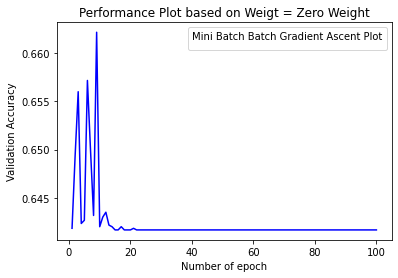

In [80]:
w6 = np.random.normal(size=(train_features.shape[1],1))

arr6 = np.zeros((iterationNo))

s6 = time.time()
miniBatchExp(batch_size, iterationNo, w6, arr6, 1) 
e6 = time.time()

print("Acc: ", arr6[-1])

import matplotlib.pyplot as plt

x = np.arange(1, 101)
y = arr6

plt.title("Performance Plot based on Weigt = Zero Weight")
plt.ylabel("Validation Accuracy")
plt.xlabel("Number of epoch")
plt.plot(x, y, color ="blue")
plt.legend()
plt.legend(title='Mini Batch Batch Gradient Ascent Plot')
plt.show()

Acc:  0.6623333333333333


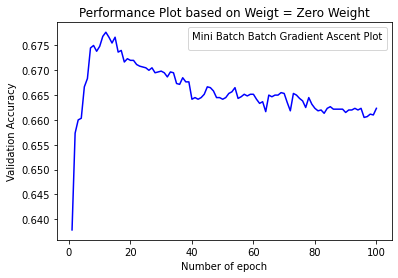

In [81]:
w7 = np.random.normal(size=(train_features.shape[1],1))

arr7 = np.zeros((iterationNo))

s7 = time.time()
miniBatchExp(batch_size, iterationNo, w7, arr7, 10**-3) 
e7 = time.time()

print("Acc: ", arr7[-1])

import matplotlib.pyplot as plt

x = np.arange(1, 101)
y = arr7

plt.title("Performance Plot based on Weigt = Zero Weight")
plt.ylabel("Validation Accuracy")
plt.xlabel("Number of epoch")
plt.plot(x, y, color ="blue")
plt.legend()
plt.legend(title='Mini Batch Batch Gradient Ascent Plot')
plt.show()

Acc:  0.676


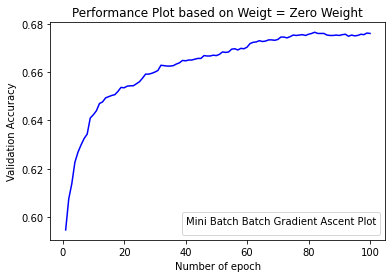

In [82]:
w8 = np.random.normal(size=(train_features.shape[1],1))

arr8 = np.zeros((iterationNo))

s8 = time.time()
miniBatchExp(batch_size, iterationNo, w8, arr8, 10**-4) 
e8 = time.time()

print("Acc: ", arr8[-1],)

import matplotlib.pyplot as plt

x = np.arange(1, 101)
y = arr8

plt.title("Performance Plot based on Weigt = Zero Weight")
plt.ylabel("Validation Accuracy")
plt.xlabel("Number of epoch")
plt.plot(x, y, color ="blue")
plt.legend()
plt.legend(title='Mini Batch Batch Gradient Ascent Plot')
plt.show()

Acc:  0.6416666666666667


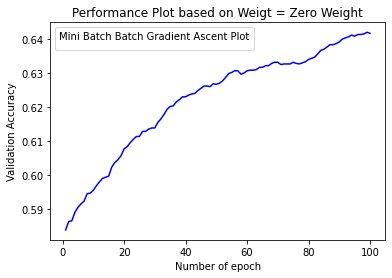

In [83]:
w9 = np.random.normal(size=(train_features.shape[1],1))

arr9 = np.zeros((iterationNo))

s9 = time.time()
miniBatchExp(batch_size, iterationNo, w9, arr9, 10**-5) 
e9 = time.time()

print("Acc: ", arr9[-1])

import matplotlib.pyplot as plt

x = np.arange(1, 101)
y = arr9

plt.title("Performance Plot based on Weigt = Zero Weight")
plt.ylabel("Validation Accuracy")
plt.xlabel("Number of epoch")
plt.plot(x, y, color ="blue")
plt.legend()
plt.legend(title='Mini Batch Batch Gradient Ascent Plot')
plt.show()

The best learning rate 10^-4

In [84]:
lR_prediction = prediction(validation_features_arr, w8)
confusionMatrix(lR_prediction, validation_labels_arr)



3629 427 1723 221


,0,1
0,3629,1723
1,221,427


Best Parameters

10^-4, gaussian, full batch

In [88]:
w10 = np.random.normal(0, 1, size=(train_features.shape[1],1))

arr10 = np.zeros((iterationNo))

s10 = time.time()
fullBatch(iterationNo, w10, arr10, 10 ** -4)
e10 = time.time()

print("Acc: ", arr10.max(), "Time: ", e10 - s10)



fb_prediction = prediction(validation_features_arr, w10)
confusionMatrix(fb_prediction, validation_labels_arr)


<ipython-input-38-a5cbce557ae8>:2: RuntimeWarning: overflow encountered in exp
  z = np.exp(-1*np.matmul(features,weights))


Acc:  0.6891666666666667 Time:  4.163820028305054
3826 127 2023 24


,0,1
0,3826,2023
1,24,127
